# Mathematics for Machine Learning

Machine learning is about designing algorithms that automatically extract valuable information from data.
The emphasis here is on “automatic”, i.e., machine learning is concerned about general-purpose methodologies that can be applied to many datasets, while producing something that is meaningful.
There are three concepts that are at the core of machine learning:
- **data:** we represent data as vectors.
- **a model:** we choose an appropriate model, either using the probabilistic or optimization view.
- **and learning:** we learn from available data by using numerical optimization methods with the aim that the model performs well on data not used for training.
## Vectors
A _vector_ is an ordered finite list of numbers. Vectors are usually written as vertical arrays, surrounded by square or curved brackets, as in
$$
\begin{bmatrix}
-1.1\\
0.0\\
3.6\\
-7.2
\end{bmatrix}
\;\text{or}\;
\begin{pmatrix}
-1.1\\
0.0\\
3.6\\
-7.2
\end{pmatrix}
$$
They can also be written as numbers separated by commas and surrounded by parentheses. In this notation style, the vector above is written as
$$
(-1.1, 0.0, 3.6, -7.2)
$$

In [ ]:
import numpy as np


a = np.array([-1, 0.0, 3.6, -7.2])
# type(a)
a.shape

(4,)

In [ ]:
a.reshape(4, 1)

array([[-1. ],
       [ 0. ],
       [ 3.6],
       [-7.2]])

In [ ]:
a[:, np.newaxis]

array([[-1. ],
       [ 0. ],
       [ 3.6],
       [-7.2]])

In [ ]:
print(np.array([-1, 0.0, 3.6, -7.2])[:, np.newaxis])
print(np.array([-1, 0.0, 3.6, -7.2])[:, np.newaxis].shape)

[[-1. ]
 [ 0. ]
 [ 3.6]
 [-7.2]]
(4, 1)


#### Block or stacked vectors
It is sometimes useful to define vectors by concatenating or stacking two or more vectors, as in
$$
a = \begin{bmatrix}
b\\
c\\
d
\end{bmatrix}
$$
where $ a $, $ b $, $ c $, and $ d $ are vectors. If $ b $ is an $ m $-vector, $ c $ is an $ n $-vector, and $ d $ is an $ p $-vector, this defines the $ (m + n + p) $-vector
$$
a = (b_1, \ldots, b_m, c_1, \ldots, c_n, d_1, \ldots, d_p).
$$
Stacked vectors can include scalars (numbers).
>
> For example if $ a $ is a $ 3 $-vector, $ (1, a) $ is the $ 4 $-vector $ (1, a1 , a2 , a3) $.

In [ ]:
b = np.array([-1, 0.0, 3.6, -7.2])
c = np.array([0.0, 0.3, -2, -1])
d = np.array([0.0, 0.0, 0.0, 1])

a = np.concatenate((b, c, d))
# print(a)
a2 = np.hstack((b, c, d))
# print(a2)
a22 = np.hstack((b[:, None], c[:, None], d[:, None]))
# a22
a3 = np.vstack((b, c, d))
# print(a3)
a32 = np.vstack((b[:, None], c[:, None], d[:, None]))
print(a32)

[[-1. ]
 [ 0. ]
 [ 3.6]
 [-7.2]
 [ 0. ]
 [ 0.3]
 [-2. ]
 [-1. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 1. ]]


#### Sub-vectors
Colon notation is used to denote subvectors. If $ a $ is a vector, then $ a_{r:s} $ is the vector of size $ s − r + 1 $, with entries $ a_r, \ldots, a_s $:
$$
a_{r:s} = (a_r, \ldots, a_s).
$$
The subscript $ r:s $ is called the _index range_. Thus, in our example above, we have
$$
b = a_{1:m}, \quad c = a_{(m+1):(m+n)}, \quad d = a_{(m+n+1):(m+n+p)}.
$$

In [ ]:
a[::2]

array([-1. ,  3.6,  0. , -2. ,  0. ,  0. ])

In [ ]:
a[:4]

array([-1. ,  0. ,  3.6, -7.2])

In [ ]:
print(a[3:7])
print(a[:7])

[-7.2  0.   0.3 -2. ]
[-1.   0.   3.6 -7.2  0.   0.3 -2. ]


#### Indexing
In many computer languages, arrays of length n are indexed from $ i = 0 $ to $ i = n − 1 $. But in standard mathematical notation, $ n $-vectors are indexed from $ i = 1 $ to $ i = n $, so in this book, vectors will be indexed from $ i = 1 $ to $ i = n $.

In [ ]:
a

array([-1. ,  0. ,  3.6, -7.2,  0. ,  0.3, -2. , -1. ,  0. ,  0. ,  0. ,
        1. ])

In [ ]:
print(a[6])

-2.0


#### Zero vectors
A _zero vector_ is a vector with all elements equal to zero. Sometimes the zero vector of size $ n $ is written as $ 0_n $, where the subscript denotes the size. But usually a zero vector is denoted just $ 0 $, the same symbol used to denote the number $ 0 $. In this case you have to figure out the size of the zero vector from the context.

In [ ]:
print(np.zeros(3))
print(np.zeros((3, 2)))

[0. 0. 0.]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


#### Unit vectors
A (standard) _unit vector_ is a vector with all elements equal to zero, except one element which is equal to one. The ith unit vector (of size $ n $) is the unit vector with ith element one, and denoted $ e_i $.

> For example, the vectors
$$
e_1 = \begin{bmatrix}
1\\
0\\
0
\end{bmatrix}, \quad
e_2 = \begin{bmatrix}
0\\
1\\
0
\end{bmatrix}, \quad
e_3 = \begin{bmatrix}
0\\
0\\
1
\end{bmatrix}
$$

In [ ]:
e = np.zeros(3)
e[1] = 1
print(e)

[0. 1. 0.]


#### Ones vector
We use the notation $ \mathbf{1_n} $ for the $ n $-vector with all its elements equal to one. We also write $ \mathbf{1} $ if the size of the vector can be determined from the context.

In [ ]:
print(np.ones(3))
print(np.ones((2, 4)))

[1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


#### Sparsity
A vector is said to be sparse if many of its entries are zero; its sparsity pattern is the set of indices of nonzero entries. The number of the nonzero entries of an $ n $-vector $ x $ is denoted $ \textbf{nnz}(x) $.

Unit vectors are sparse, since they have only one nonzero entry. The zero vector is the sparsest possible vector, since it has no nonzero entries. Sparse vectors arise in many applications.

In [ ]:
a = np.array([[0, 1, 7, 0],
              [3, 0, 2, 19]])
b = np.zeros((5, 6))
print(np.count_nonzero(a))
print(np.count_nonzero(b))

5
0


#### Examples

###### Location and displacement
A 2-vector can be used to represent a position or location in a $ 2 $-dimensional ($ 2 $-D) space, i.e., a plane, as shown in the following figure.

A $ 3 $-vector is used to represent a location or position of some point in $ 3 $-dimensional ($ 3 $-D) space. The entries of the vector give the coordinates of the position or location.

In [ ]:
# !pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()
import matplotlib.pyplot as plt


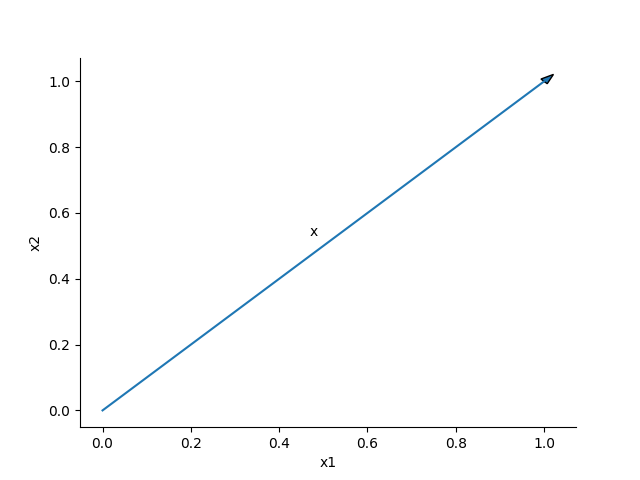

In [ ]:
%matplotlib widget

x = np.array([0, 1])

fig, ax = plt.subplots()
ax.plot(x)
ax.arrow(1 - 0.001, 1 - 0.001, 0.001, 0.001, head_width=0.02)
ax.text(0.47, 0.53, 'x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

###### Color
A $ 3 $-vector can represent a color, with its entries giving the Red, Green, and Blue (RGB) intensity values (often between $ 0 $ and $ 1 $).

> The vector $ (0, 0, 0) $ represents black, the vector $ (0, 1, 0) $ represents a bright pure green color, and the vector $ (1, 0.5, 0.5) $ represents a shade of pink.

In [ ]:
plt.close(fig)

(0.0, 1.0, 0.0, 1.0)

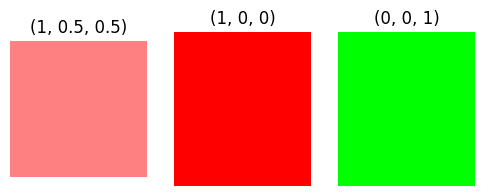

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 2))
ax1.add_patch(Rectangle((0, 0), 1, 1, color=(1, 0.5, 0.5)))
ax1.set_title('(1, 0.5, 0.5)')
ax1.set_aspect('equal')
ax1.axis('off')
ax2.add_patch(Rectangle((0, 0), 1, 1, color=(1, 0, 0)))
ax2.set_title('(1, 0, 0)')
ax2.axis('off')
ax3.add_patch(Rectangle((0, 0), 1, 1, color=(0, 1, 0)))
ax3.set_title('(0, 0, 1)')
ax3.axis('off')

###### Time series
An $ n $-vector can represent a time series or signal, that is, the value of some quantity at different times. (The entries in a vector that represents a time series are sometimes called samples, especially when the quantity is something measured.)

> An audio (sound) signal can be represented as a vector whose entries give the value of acoustic pressure at equally spaced times (typically $ 48000 $ or $ 44100 $ per second). A vector might give the hourly rainfall (or temperature, or barometric pressure) at some location, over some time period.

When a vector represents a time series, it is natural to plot $ x_i $ versus $ i $ with lines connecting consecutive time series values.

In [ ]:
plt.close(fig)

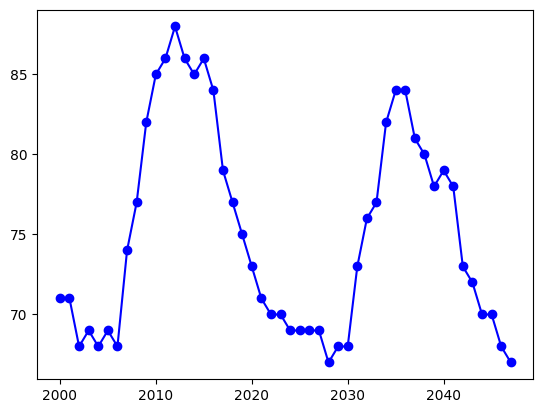

In [ ]:
temps = [71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69,
         67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72, 70, 70, 68, 67]
# print(len(temps))
fig = plt.figure()
plt.plot(range(2000, 2000 + len(temps)), temps, '-bo')

In [ ]:
plt.close(fig)

In [ ]:
from IPython.display import Audio
import numpy as np

fs = 44100
# fs = 128000
data1 = np.random.uniform(-1, 1, 2 * fs)
data2 = np.sin(np.linspace(0, 1, fs))
print(data2.shape)
audio = Audio(data1, rate=2 * fs)
display(audio)


fs = 44100
audio_data = np.sin(2 * np.pi * 220 * np.arange(fs*30) / fs)
audio_output = Audio(audio_data, rate=fs)
display(audio_output)

(44100,)


###### Images
A monochrome (black and white) image is an array of $ M \times N $ pixels (square patches with uniform grayscale level) with $ M $ rows and $ N $ columns. Each of the $ M N $ pixels has a grayscale or intensity value, with $ 0 $ corresponding to black and $ 1 $ corresponding to bright white. (Other ranges are also used; like $ 0 $ to $ 255 $) An image can be represented by a vector of length $ M N $, with the elements giving grayscale levels at the pixel locations, typically ordered column-wise or row-wise.

A color $ M \times N $ pixel image is described by a vector of length $ 3M N $ ($ M \times N \times 3 $), with the entries giving the $ R $, $ G $, and $ B $ values for each pixel, in some agreed-upon order.

###### Video
A monochrome video, i.e., a sequence of length $ K $ of images with $ M \times N $ pixels, can be represented by a vector of length $ K M N $ (again, in some particular order). That is,
$$
(A^1_{M \times N}, \ldots, A^K_{M \times N})
$$

(10, 10)
(10, 10, 3)


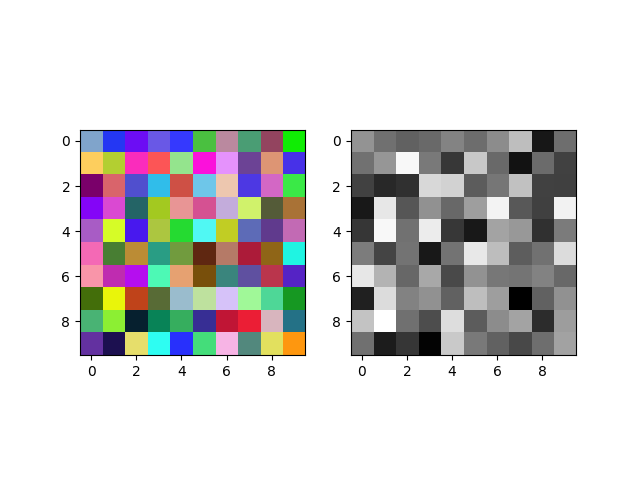

In [ ]:
from PIL import Image, ImageOps

image = np.random.rand(10, 10, 3)

pil_image = Image.fromarray(image, 'RGB')
pil_gray_image = ImageOps.grayscale(pil_image)

gray_image = np.array(pil_gray_image)
print(gray_image.shape)
# print(gray_image)
# print(image)
print(image.shape)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax2.imshow(gray_image, cmap='gray')
#     plt.show()
#     plt.close(fig)

In [ ]:
plt.close(fig)

###### Word count and histogram
A vector of length n can represent the number of times each word in a dictionary of $ n $ words appears in a document.

> For example, $ (25, 2, 0) $ means that the first dictionary word appears $ 25 $ times, the second one twice, and the third one not at all.

> A small example is shown in the following figure. A variation is to have the entries of the vector give the histogram of word frequencies in the document, so that, e.g., $ x_5 = 0.003 $ means that $ 0.3 $% of all the words in the document are the fifth word in the dictionary.

> It is common practice to count variations of a word (say, the same word stem with different endings) as the same word; for example, 'rain', 'rains', 'raining', and 'rained' might all be counted as 'rain'. Reducing each word to its stem is called **stemming**.

> It is also common practice to exclude words that are too common (such as 'a' or 'the'), which are referred to as _stop words_, as well as words that are extremely rare.

['word', 'count', 'vectors', 'are', 'used', 'in', 'computer', 'based', 'document', 'analysis', 'each', 'entry', 'of', 'the', 'word', 'count', 'vector', 'is', 'the', 'number', 'of', 'times', 'the', 'associated', 'dictionary', 'word', 'appears', 'in', 'the', 'document']
Counter({'the': 4, 'word': 3, 'count': 2, 'in': 2, 'document': 2, 'of': 2, 'vectors': 1, 'are': 1, 'used': 1, 'computer': 1, 'based': 1, 'analysis': 1, 'each': 1, 'entry': 1, 'vector': 1, 'is': 1, 'number': 1, 'times': 1, 'associated': 1, 'dictionary': 1, 'appears': 1})


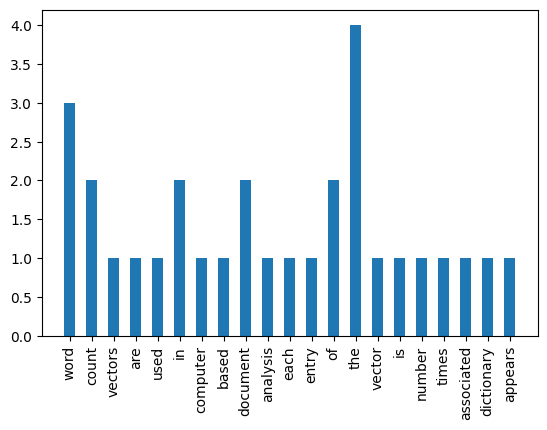

In [ ]:
text = 'Word count vectors are used in computer based document analysis. ' \
       'Each entry of the word count vector is the number of times the associated dictionary word appears in the document.'

from collections import Counter

split_text = text.lower().replace('.', '').split(' ')
counts = Counter(split_text)
print(split_text)
print(counts)

fig, _ = plt.subplots()
# range(len(counts.keys()))
bars = counts.keys()
n_bars = np.arange(len(bars))
plt.bar(n_bars, counts.values(), width=.5)
plt.xticks(n_bars, counts.keys(), rotation=90)
plt.subplots_adjust(bottom=0.2)

In [ ]:
plt.close(fig)

###### Features or attributes
In many applications a vector collects together $ n $ different quantities that pertain to a single thing or object. The quantities can be measurements, or quantities that can be measured or derived from the object. Such a vector is sometimes called a **feature vector**, and its entries are called the **features** or **attributes**.

> For example, a $ 6 $-vector f could give the age, height, weight, blood pressure, temperature, and gender of a patient admitted to a hospital. (The last entry of the vector could be encoded as $ f_6 = 0 $ for male, $ f_6 = 1 $ for female.)

###### Vector entry labels
In applications such as the ones described above, each entry of a vector has a meaning, such as the count of a specific word in a document, the number of shares of a specific stock held in a portfolio, or the rainfall in a specific hour. It is common to keep a separate list of labels or tags that explain or annotate the meaning of the vector entries.

> As an example, we might associate the portfolio vector $ (100, 50, 20) $ with the list of ticker symbols $ (AAPL, INTC, AMZN) $, so we know that assets $ 1 $, $ 2 $, and $ 3 $ are Apple, Intel, and Amazon.

In some applications, such as an image, the meaning or ordering of the entries follow known conventions or standards.

### Vector addition
Two vectors of _the same size_ can be added together by adding the corresponding elements, to form another vector of the same size, called the **sum** of the vectors. Vector addition is denoted by the symbol $ + $.

> For example,
$$
\begin{bmatrix}
0\\
7\\
3
\end{bmatrix} +
\begin{bmatrix}
1\\
2\\
0
\end{bmatrix} = \begin{bmatrix}
1\\
9\\
3
\end{bmatrix}
$$

The result of vector subtraction is called the **difference** of the two vectors.

In [ ]:
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

print('Sum of arrays:', x + y)
print('Difference of arrays:', x - y)

Sum of arrays: [11 22 33]
Difference of arrays: [ -9 -18 -27]


#### Examples

###### Word counts
If $ a $ and $ b $ are word count vectors (using the same dictionary) for two documents, the sum $ a + b $ is the word count vector of a new document created by combining the original two (in either order). The word count difference vector $ a − b $ gives the number of times more each word appears in the first document than the second.

###### Market clearing
Suppose the $ n $-vector $ q_i $ represents the quantities of $ n $ goods or resources produced (when positive) or consumed (when negative) by agent $ i $, for $ i = 1, \ldots, N $, so $ (q_5)_4 = −3.2 $ means that agent $ 5 $ consumes $ 3.2 $ units of resource $ 4 $. The sum $ s = q_1 + \cdots + q_N $ is the $ n $-vector of total net surplus of the resources (or shortfall, when the entries are negative). When $ s = 0 $, we have a closed market, which means that the total quantity of each resource produced by the agents balances the total quantity consumed. In other words, the $ n $ resources are _exchanged_ among the agents. In this case we say that the market clears (with the resource vectors $ q_1 , \ldots , q_N $).

###### Audio addition
When $ a $ and $ b $ are vectors representing audio signals over the same period of time, the sum $ a + b $ is an audio signal that is perceived as containing both audio signals combined into one. If $ a $ represents a recording of a voice, and $ b $ a recording of music (of the same length), the audio signal $ a + b $ will be perceived as containing both the voice recording and, simultaneously, the music.

In [ ]:
fs = 44100
a = np.random.uniform(-1, 1, fs)
b = np.sin(np.linspace(0, 3000, fs))
Audio(a + b, rate=fs)

### Scalar-vector multiplication
Another operation is scalar multiplication or scalar-vector multiplication, in which a vector is multiplied by a scalar (i.e., number), which is done by multiplying every element of the vector by the scalar.
> For example
$$
(-2) \begin{bmatrix}
1\\
9\\
6
\end{bmatrix} = \begin{bmatrix}
-2\\
-18\\
-12
\end{bmatrix}
$$

In [ ]:
x = np.array([1, 2, 3])
print(2.2 * x)

[2.2 4.4 6.6]


#### Scalar-vector addition
In **Python**, you can add a scalar a and a *numpy array* (vector) $ x $ using $ x+a $. This means that the scalar is added to each element of the vector.

This is, however, **NOT** a standard mathematical notation. In mathematical notations, we should denote this as, e.g. $ x + a \mathbf{1} $, where $ x $ is an $ n $-vector and a is a scalar.

In [ ]:
x = np.array([1,2,3,4])
print(x + 2)

[3 4 5 6]


#### Elementwise operations
In Python we can perform elementwise operations on numpy arrays.

For numpy arrays of the same length $ x $ and $ y $, the expressions $ x * y $, $ x / y $ and $ x ** y $ give the resulting vectors of the same length as $ x $ and $ y $ and $ i $th element $ x_i y_i $, $ x_i / y_i $, and  $x_i^{y_i} $ respectively.

In [ ]:
p_initial = np.array([22.15, 89.32, 56.77])
p_final = np.array([23.05, 87.32, 53.13])
r = (p_final - p_initial) / p_initial
r

array([ 0.04063205, -0.0223914 , -0.06411837])

#### Linear combinations
If $ a_1, \ldots, a_m $ are $ n $-vectors, and $ β_1, \ldots, β_m $ are scalars, the $ n $-vector
$$
β_1 a_1 + \cdots + β_m a_m
$$
is called a linear combination of the vectors $ a_1 , \ldots, a_n $. The scalars $ β_1 , \ldots, β_m $ are called the coefficients of the linear combination.

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])

alpha = -0.5
beta = 1.5

c = alpha * a + beta * b

print(c)

[4. 5.]


#### Examples
###### Audio mixing
When $ a_1 , \ldots, a_m $ are vectors representing audio signals (over the same period of time, for example, simultaneously recorded), they are called tracks. The linear combination
$$
β_1 a_1 + \cdots + β_m a_m
$$
is perceived as a mixture (also called a mix ) of the audio tracks, with relative loudness given by $ |β_1|, \ldots, |β_m| $. A producer in a studio, or a sound engineer at a live show, chooses values of $ β_1 , \ldots, β_m $ to give a good balance between the different
instruments, vocals, and drums.

In [ ]:
fs = 44100
a = np.random.uniform(-1, 1, fs)
b = np.sin(np.linspace(0, 3000, fs))
Audio(0.01 * a + 2 * b, rate=fs)

###### Line and segment
When $ a $ and $ b $ are different $ n $-vectors, the affine combination $ c = (1 - θ)a + θb $, where $ θ $ is a scalar, describes a point on the line passing through $ a $ and $ b $. When $ 0 \le θ \le 1 $, $ c $ is a convex combination of $ a $ and  $ b $, and is said to lie on the segment between $ a $ and $ b $.

In [ ]:
a = 3
b = 7
theta = 0.5
c = (1 - theta) * a + theta * b
print('c:', c)
theta = np.linspace(0, 1, 5)
theta = theta[1:-1]
print('theta:', theta)
c = (1 - theta) * a + theta * b
print('c:', c)

c: 5.0
theta: [0.25 0.5  0.75]
c: [4. 5. 6.]


### Inner product
The (standard) **inner product** (also called **dot product**) of two n-vectors is defined as the scalar
$$
a^T b = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n,
$$
the sum of the products of corresponding entries.

Some other notations for the inner product (that we will not use in this book) are $ \langle a, b \rangle $, $ \langle a | b \rangle $, and $ a \cdot b $.

> As a specific example of the inner product, we have
$$
\begin{bmatrix}
-1\\
2\\
2
\end{bmatrix}^T
\begin{bmatrix}
1\\
0\\
-3
\end{bmatrix}
=(-1)(1) + (2)(0) + (2)(-3) = -7
$$

In [ ]:
a = np.array([-1, 2, 2])
b = np.array([1, 0, -3])

print(np.inner(a, b))
print(np.dot(a, b))
print(a.dot(b))
print(a @ b)

-7
-7
-7
-7


#### Special linear combinations
Some linear combinations of the vectors $ a_1, \ldots, a_m $ have special names.

> For example, the linear combination with $ β_1 = \cdots = β_m = 1 $ given by
$$
a_1 + \cdots + a_m,
$$ is the sum of the vectors, and the linear combination with $ β_1 = \cdots = β_m = 1/m $, given by
$$
(1/m)(a_1 + \cdots + a_m),
$$
is the average of the vectors.

> When the coefficients sum to one, i.e., $ β_1 + \cdots + β_m = 1$, the linear combination is called an **affine combination**. When the coefficients in an affine combination are nonnegative, it is called a **convex combination**, a **mixture**, or a **weighted average**. The coefficients in an affine or convex combination are sometimes given as percentages, which add up to $ 100\% $.

> The inner product of a vector with itself gives the sum of the squares of the elements of the vector. That is,
$$
a^T a = a_1^2 + a_2^2 + \cdots + a_n^n.
$$

In [ ]:
# sum of an array
a = np.arange(5)
print(f"a = {a}")
print(f'{a = }')
b = np.ones(5)
print(f'{b = }')
c = np.dot(a, b)
print(f'{c = }')

b = np.array([1/len(a)])
print(f'{b = }')
b = b * np.ones_like(a)
c = np.dot(a, b)
print(f'{c = }')

a = [0 1 2 3 4]
a = array([0, 1, 2, 3, 4])
b = array([1., 1., 1., 1., 1.])
c = 10.0
b = array([0.2])
c = 2.0


#### Block vectors
If the vectors a and b are block vectors, and the corresponding blocks have the same sizes (in which case we say they conform), then we have
$$
a^T b = \begin{bmatrix}
a_1\\
\vdots\\
a_k
\end{bmatrix}^T
\begin{bmatrix}
b_1\\
\vdots\\
b_k
\end{bmatrix}
=
a_1^T b_1 + a_2^T b_2 + \cdots + a_k^T b_k.
$$

The inner product of block vectors is the sum of the inner products of the blocks.

#### Examples
###### Co-occurrence
If $ a $ and $ b $ are $ n $-vectors that describe occurrence, i.e., each of their elements is either $ 0 $ or $ 1 $, then $ a^T b $ gives the total number of indices for which $ a_i $ and $ b_i $ are both one, that is, the total number of co-occurrences.

If we interpret the vectors $ a $  and $ b $ as describing subsets of $ n $ objects, then $ a^T b $ gives the number of objects in the intersection of the two subsets.

> For two subsets $ A $ and $ B $ of $ 7 $ objects, labeled $ 1, \ldots, 7 $, with corresponding occurrence vectors
$$
a = (0, 1, 1, 1, 1, 1, 1), \quad
b = (1, 0, 1, 0, 1, 0, 0).
$$
Here we have $ a^T b = 2 $, which is the number of objects in both $ A $ and $ B $ (i.e.,
objects $ 3 $ and $ 5 $).

In [ ]:
a = np.array([0, 1, 1, 1, 1, 1, 1])
b = np.array([1, 0, 1, 0, 1, 0, 0])

c = np.dot(a, b)
print(f'{c = }')

c = 2


###### Weights, features, and score

When the vector $ f $ represents a set of features of an object, and $ w $ is a vector of the same size (often called a **weight vector**), the inner product $ w^T f $ is the sum of the feature values, scaled (or weighted) by the weights, and is sometimes called a **score**.
> For example, if the features are associated with a loan applicant (e.g., age, income, ...), we might interpret $ s = w^T f $ as a credit score. In this example we can interpret $ w_i $ as the weight given to feature $ i $ in forming the score.

###### Price-quantity
If $ p $ represents a vector of prices of $ n $ goods, and $ q $ is a vector of quantities of the $ n $ goods (say, the bill of materials for a product), then their inner product $ p^T q $ is the total cost of the goods given by the vector $ q $.

In [ ]:
p = np.array([2.5, 1, 3.2, 6, 0.5])
q = np.array([0, 3, 1, 1, 9])

cost = np.dot(p, q)
print(f'{cost = }')

cost = 16.7


###### Probability and expected values
Suppose the $ n $-vector $ p $ has nonnegative entries that sum to one, so it describes a set of proportions among $ n $ items, or a set of probabilities of $ n $ outcomes, one of which must occur. Suppose $ f $ is another $ n $-vector, where we interpret $ f_i $ as the value of some quantity if outcome $ i $ occurs. Then $ f^T p $ gives the expected value or mean of the quantity, under the probabilities (or fractions) given by $ p $.

###### Polynomial evaluation
Suppose the $ n $-vector $ c $ represents the coefficients of a polynomial $ p $ of degree $ n − 1 $ or less:
$$
p(x) = c_1 + c_2 x + \cdots + c_{n−1} x^{n−2} + c_n x^{n−1}.
$$
Let $ t $ be a number, and let $ z = (1, t, t^2 , . . . , t^{n−1} ) $ be the $ n $-vector of powers of $ t $. Then $ c^T z = p(t) $, the value of the polynomial $ p $ at the point $ t $. So the inner product of a polynomial coefficient vector and vector of powers of a number evaluates the polynomial at the number.

In [ ]:
t = 1.1
n = 5 # degree of polynomial
z = np.array([t ** i for i in range(n + 1)])
print(f'{z = }')
c = np.array([np.random.rand() for i in range(n + 1)])
print(f'{c = }')
p_t = np.dot(c, z)
print(f'{p_t = }')

z = array([1.     , 1.1    , 1.21   , 1.331  , 1.4641 , 1.61051])
c = array([0.29719505, 0.48262855, 0.52307184, 0.15901355, 0.26839232,
       0.30370955])
p_t = 2.5547308835381544


###### Net present value
Let $ c $ be an $ n $-vector representing a cash flow, with $ c_i $ the cash received (when $ c_i > 0 $) in period $ i $. Let $ d $ be the $ n $-vector defined as
$$
d = (1, 1/(1 + r), . . . , 1/(1 + r)^{n−1}),
$$
where $ r \ge 0 $ is an interest rate. Then
$$
d^T c = c_1 + c_2 /(1 + r) + \cdots + c_n /(1 + r)^{n−1}
$$
is the total of the cash flow, i.e., its net present value (NPV), with interest rate $ r $.

In [ ]:
import numpy as np
c = np.array([0.1, 0.1, 0.1, 1.1]) # cash flow vector
n = len(c)
r = 0.05 # 5% per-period interest rate

d = np.array([(1+r)**(-i) for i in range(n)])
NPV = c @ d
print(NPV)

1.236162401468524
3.7232480293704784


2.718281828459045

###### Document sentiment analysis

Suppose the $ n $-vector $ x $ represents the histogram of word occurrences in a document, from a dictionary of $ n $ words. Each word in the dictionary is assigned to one of three sentiment categories: *Positive*, *Negative*, and *Neutral*. The list of positive words might include 'nice' and 'superb'; the list of negative words might include 'bad' and 'terrible'. Neutral words are those that are neither positive nor negative. We encode the word categories as an $ n $-vector $ w $, with $ w_i = 1 $ if word $ i $ is positive, with $ w_i = −1 $ if word $ i $ is negative, and $ w_i = 0 $ if word $ i $ is neutral. The number $ w^T x $ gives a (crude) measure of the sentiment of the document.

### Complexity of vector computations

#### Computer representation of numbers and vectors

Real numbers are stored in computers using floating point format, which represents a real number using a block of $ 64 $ *bits* ($ 0 $s and $ 1 $s), or $ 8 $ *bytes* (groups of $ 8 $ bits). Each of the $ 2^{64} $ possible sequences of bits corresponds to a specific real number.

In [ ]:
a = np.array(1/3, dtype='float64')
b = np.array(1, dtype='float64')

lhs = (a + b) * (a - b)
rhs = a ** 2 - b ** 2
residual = lhs - rhs
print(f"{residual:.3e}")

-1.110e-16


#### Complexity of vector operations
Scalar-vector multiplication $ ax $, where $ x $ is an $ n $-vector, requires $ n $ multiplications, i.e., $ a x_i $ for $ i = 1, \ldots, n $.

Vector addition $ x + y $ of two $ n $-vectors takes $ n $ additions, i.e., $ x_i + y_i $ for $ i = 1, \ldots, n $. Computing the inner product $ x^T y = x_1 y_1 + \cdots + x_n y_n $ of two n-vectors takes $ 2n - 1 $ flops, $ n $ scalar multiplications and $ n - 1 $ scalar additions. So scalar multiplication, vector addition, and the inner product of $ n $-vectors require $ n $, $ n $, and $ 2n - 1 $ flops, respectively.

We only need an estimate, so we simplify the last to $ 2n $ flops, and say that the complexity of scalar multiplication, vector addition, and the inner product of $ n $-vectors is $ n $, $ n $, and $ 2n $ flops, respectively. We can guess that a $ 1 $ Gflop/s computer can compute the inner product of two vectors of size one million in around one thousandth of a second, but we should not be surprised if the actual time differs by a factor of $ 10 $ from this value.

#### Complexity of sparse vector operations

If $ x $ is sparse, then computing $ ax $ requires $ \textbf{nnz}(x) $ flops. If $ x $ and $ y $ are sparse, computing $ x + y $ requires no more than $ \min\{\textbf{nnz}(x), \textbf{nnz}(y)\} $ flops (since no arithmetic operations are required to compute $ (x + y)_i $ when either $ x_i $ or $ y_i $ is zero). If the sparsity patterns of $ x $ and $ y $ do not overlap (intersect), then zero flops are needed to compute $ x + y $. The inner product calculation is similar: computing $ x^T y $ requires no more than $ 2 \min\{\textbf{nnz}(x), \textbf{nnz}(y)\} $ flops. When the sparsity patterns of $ x $ and $ y $ do not overlap, computing $ x^T y $ requires zero flops, since $ x^T y = 0 $ in this case.

In [ ]:
from scipy.sparse import coo_matrix
empty = coo_matrix((3, 4), dtype=np.int8).toarray()
print(f'{empty = }')

row  = np.array([0, 3, 1, 0])
col  = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])

sparse_matrix = coo_matrix((data, (row, col)), shape=(4, 4)).toarray()
print(f'{sparse_matrix = }')

empty = array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)
sparse_matrix = array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])
